# Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import iqr
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

merged_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')

merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumor_group = merged_df.groupby("Drug Regimen")

tumor_mean = tumor_group['Tumor Volume (mm3)'].mean()

tumor_mean

tumor_median = tumor_group['Tumor Volume (mm3)'].median()

tumor_median

tumor_var = tumor_group['Tumor Volume (mm3)'].var()

#tumor_var

tumor_sdv = tumor_group['Tumor Volume (mm3)'].std()

#tumor_sdv

tumor_sem = tumor_group['Tumor Volume (mm3)'].sem()

#tumor_sem

tumor_stats = pd.DataFrame(tumor_mean)

tumor_stats = tumor_stats.rename(columns={'Tumor Volume (mm3)':'Mean Tumor Volume (mm3)'})

tumor_stats['Median Tumor Volume (mm3)'] = (tumor_median)

tumor_stats['Variance Tumor Volume (mm3)'] = (tumor_var)

tumor_stats['Std. Dev. Tumor Volume (mm3)'] = (tumor_sdv)

tumor_stats['SEM Tumor Volume (mm3)'] = tumor_sem

tumor_stats


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Std. Dev. Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar plots

Text(0, 0.5, 'Number of Trials')

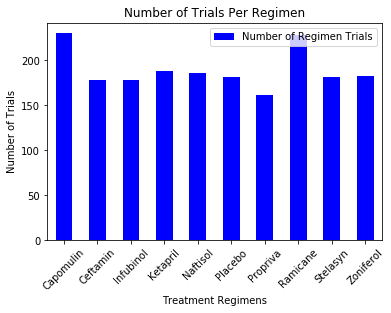

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

reg_count = merged_df.groupby("Drug Regimen")

total_count = reg_count['Tumor Volume (mm3)'].count()

total_count_df = pd.DataFrame(total_count)

total_count_df = total_count_df.rename(columns={'Tumor Volume (mm3)':'Number of Regimen Trials'})

tc_graph = total_count_df.plot(kind="bar",  title="Number of Trials Per Regimen", rot=45, color='b')

tc_graph.set_xlabel("Treatment Regimens")

tc_graph.set_ylabel("Number of Trials")




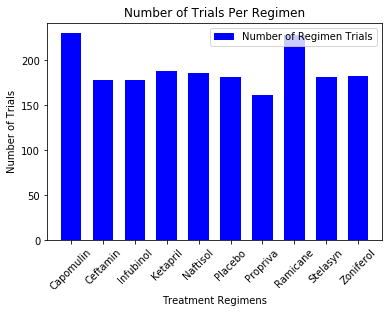

In [5]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

total_count_data = total_count.reset_index()

total_count_data

drug_regimen = total_count_data['Drug Regimen']

num_regimen = total_count_data['Tumor Volume (mm3)']

num_regimen

x_axis = np.arange(len(num_regimen))

plt.bar(x_axis, num_regimen, color='b', align='center', width=.65)

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, drug_regimen, rotation=45)

plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("Number of Trials Per Regimen")

plt.xlabel("Treatment Regimens")

plt.ylabel("Number of Trials")

plt.legend(["Number of Regimen Trials"])


# Pie plots

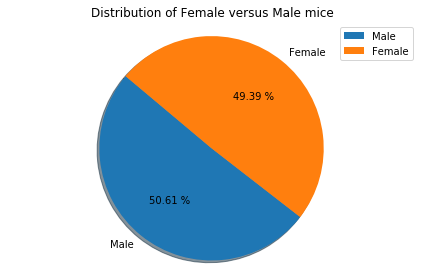

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pandas 

gender_counts = merged_df["Sex"].value_counts()

gender_list = gender_counts.keys()

gender_pie = gender_counts.plot(kind="pie", y=gender_list, title="Distribution of Female versus Male mice", autopct="%.2f %%", shadow=True, startangle=140)

gender_pie.set_ylabel("")    

plt.axis("equal")

plt.legend(gender_list)

plt.tight_layout()



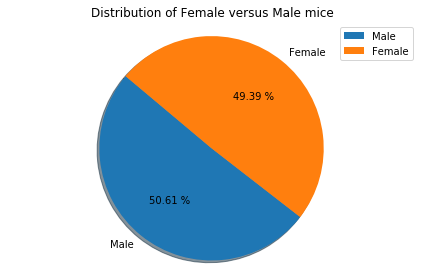

In [7]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_counts = merged_df["Sex"].value_counts()

gender_list = gender_counts.keys()

gender_pieplot = plt.pie(gender_counts, labels=gender_list, shadow=True, autopct="%.2f %%", startangle=140)

plt.axis("equal")

plt.title("Distribution of Female versus Male mice")

plt.legend(gender_list)

plt.tight_layout()



 # Quartiles, outliers and boxplots

In [8]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.  

avg_tum = tumor_stats.get(["Mean Tumor Volume (mm3)"])

avg_tum_sort = avg_tum.sort_values("Mean Tumor Volume (mm3)", ascending=True)

avg_tum_sort.head(4)

# Ramicane Data

ramicane_group = merged_df.loc[merged_df["Drug Regimen"] == "Ramicane",:]

ramicane_group = ramicane_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

ramicane_group = ramicane_group.groupby("Mouse ID").last()

ramicane_group_df = ramicane_group.reset_index()

ramicane_df = ramicane_group_df["Tumor Volume (mm3)"]

ramicane_stats = ramicane_df.describe().round(2)

print(f"summary stats:\nIQR      {iqr(ramicane_df).round(2)}\n{ramicane_stats}")
ramicane_df.sort_values()

#mean_ramicane = np.mean(ramicane)

#var_ramicane = np.var(ramicane,ddof = 0)

#std_ramicane = np.std(ramicane,ddof = 0)

#print(f"The mean tumor volume for Ramicane is {mean_ramicane}")
#print(f"The variance tumor volume for Ramicane is {var_ramicane}")
#print(f"The standard deviation tumor volume for Ramicane is {std_ramicane}")

 # Calculate the 68-95-99.7 rule using the standard deviation
#print(f"Roughly 68% of the data is between {round(mean_ramicane-std_ramicane,3)} and {round(mean_ramicane+std_ramicane,3)}")
#print(f"Roughly 95% of the data is between {round(mean_ramicane-2*std_ramicane,3)} and {round(mean_ramicane+2*std_ramicane,3)}")
#print(f"Roughly 99.7% of the data is between {round(mean_ramicane-3*std_ramicane,3)} and {round(mean_ramicane+3*std_ramicane,3)}")
#print("There are 0 outliers. No datapoint is 3 standard deviatons from the mean.")
#plt.boxplot(ramicane_group_df["Tumor Volume (mm3)"])

#ramicane_group_df.sort_values("Tumor Volume (mm3)", ascending=True)





summary stats:
IQR      9.1
count    25.00
mean     36.19
std       5.67
min      22.05
25%      31.56
50%      36.56
75%      40.66
max      45.22
Name: Tumor Volume (mm3), dtype: float64


13    22.050126
8     29.128472
20    30.276232
14    30.564625
24    30.638696
15    31.095335
11    31.560470
3     32.978522
5     33.397653
9     33.562402
12    36.134852
10    36.374510
17    36.561652
18    37.225650
6     37.311236
4     38.342008
0     38.407618
2     38.810366
7     40.659006
21    40.667713
1     43.047543
22    43.166373
19    43.419381
23    44.183451
16    45.220869
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# Capomulin Data

capomulin_group = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin",:]

capomulin_group = capomulin_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

capomulin_group = capomulin_group.groupby("Mouse ID").last()

capomulin_group_df = capomulin_group.reset_index()

capomulin_df = capomulin_group_df["Tumor Volume (mm3)"]

capomulin_stats = capomulin_df.describe().round(2)

print(f"summary stats:\nIQR      {iqr(capomulin_df).round(2)}\n{capomulin_stats}")


#mean_capomulin = np.mean(capomulin)

#var_capomulin = np.var(capomulin,ddof = 0)

#std_capomulin = np.std(capomulin,ddof = 0)

#print(f"The mean tumor volume for Capomulin is {mean_capomulin}")
#print(f"The variance tumor volume for Capomulin is {var_capomulin}")
#print(f"The standard deviation tumor volume for Capomulin is {std_capomulin}")

 # Calculate the 68-95-99.7 rule using the standard deviation
#print(f"Roughly 68% of the data is between {round(mean_capomulin-std_capomulin,3)} and {round(mean_capomulin+std_capomulin,3)}")
#print(f"Roughly 95% of the data is between {round(mean_capomulin-2*std_capomulin,3)} and {round(mean_capomulin+2*std_capomulin,3)}")
#print(f"Roughly 99.7% of the data is between {round(mean_capomulin-3*std_capomulin,3)} and {round(mean_capomulin+3*std_capomulin,3)}")
#print("There are 0 outliers. No datapoint is 3 standard deviatons from the mean.")
#plt.boxplot(ramicane_group_df["Tumor Volume (mm3)"])

#capomulin_group_df.sort_values("Tumor Volume (mm3)", ascending=True)



summary stats:
IQR      7.78
count    25.00
mean     36.67
std       5.72
min      23.34
25%      32.38
50%      38.13
75%      40.16
max      47.69
Name: Tumor Volume (mm3), dtype: float64


In [10]:
# Infubinol Data

infubinol_group = merged_df.loc[merged_df["Drug Regimen"] == "Infubinol",:]

infubinol_group = infubinol_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

infubinol_group = infubinol_group.groupby("Mouse ID").last()

infubinol_group_df = infubinol_group.reset_index()

infubinol_df = infubinol_group_df["Tumor Volume (mm3)"]

infubinol_stats = infubinol_df.describe().round(2)

print(f"summary stats:\nIQR      {iqr(infubinol_df).round(2)}\n{infubinol_stats}")


#mean_infubinol = np.mean(infubinol)

#var_infubinol = np.var(infubinol,ddof = 0)

#std_infubinol = np.std(infubinol,ddof = 0)

#print(f"The mean tumor volume for Infubinol is {mean_infubinol}")
#print(f"The variance tumor volume for Infubinol is {var_infubinol}")
#print(f"The standard deviation tumor volume for Infubinol is {std_infubinol}")

 # Calculate the 68-95-99.7 rule using the standard deviation
#print(f"Roughly 68% of the data is between {round(mean_infubinol-std_infubinol,3)} and {round(mean_infubinol+std_infubinol,3)}")
#print(f"Roughly 95% of the data is between {round(mean_infubinol-2*std_infubinol,3)} and {round(mean_infubinol+2*std_infubinol,3)}")
#print(f"Roughly 99.7% of the data is between {round(mean_infubinol-3*std_infubinol,3)} and {round(mean_infubinol+3*std_infubinol,3)}")
#print("There are 0 outliers. No datapoint is 3 standard deviatons from the mean.")


#infubinol_group_df.sort_values("Tumor Volume (mm3)", ascending=True)


#plt.boxplot(ramicane_group_df["Tumor Volume (mm3)"])


summary stats:
IQR      11.48
count    25.00
mean     58.18
std       8.60
min      36.32
25%      54.05
50%      60.17
75%      65.53
max      72.23
Name: Tumor Volume (mm3), dtype: float64


In [11]:
# Ceftamin Data

ceftamin_group = merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin",:]

ceftamin_group = ceftamin_group.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"])

ceftamin_group = ceftamin_group.groupby("Mouse ID").last()

ceftamin_group_df = ceftamin_group.reset_index()

ceftamin_df = ceftamin_group_df["Tumor Volume (mm3)"]

ceftamin_stats = ceftamin_df.describe().round(2)

print(f"summary stats:\nIQR      {iqr(ceftamin_df).round(2)}\n{ceftamin_stats}")

ceftamin_group_df.head()


#ceftamin.describe()

#iqr(ceftamin, axis =1)

#mean_ceftamin = np.mean(ceftamin)

#var_ceftamin = np.var(ceftamin,ddof = 0)

#std_ceftamin = np.std(ceftamin,ddof = 0)

#print(f"The mean tumor volume for Ceftamin is {mean_ceftamin}")
#print(f"The variance tumor volume for Ceftamin is {var_ceftamin}")
#print(f"The standard deviation tumor volume for Ceftamin is {std_ceftamin}")

 # Calculate the 68-95-99.7 rule using the standard deviation
#print(f"Roughly 68% of the data is between {round(mean_ceftamin-std_ceftamin,3)} and {round(mean_ceftamin+std_ceftamin,3)}")
#print(f"Roughly 95% of the data is between {round(mean_ceftamin-2*std_ceftamin,3)} and {round(mean_ceftamin+2*std_ceftamin,3)}")
#print(f"Roughly 99.7% of the data is between {round(mean_ceftamin-3*std_ceftamin,3)} and {round(mean_ceftamin+3*std_ceftamin,3)}")
#print("There are 0 outliers. No datapoint is 3 standard deviatons from the mean.")
#plt.boxplot(ramicane_group_df["Tumor Volume (mm3)"])

#ceftamin_group_df.sort_values("Tumor Volume (mm3)", ascending=True)




summary stats:
IQR      15.58
count    25.00
mean     57.75
std       8.37
min      45.00
25%      48.72
50%      59.85
75%      64.30
max      68.92
Name: Tumor Volume (mm3), dtype: float64


,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a275,Ceftamin,62.999356
1,b447,Ceftamin,45.000000
2,b487,Ceftamin,56.057749
3,b759,Ceftamin,55.742829
4,f436,Ceftamin,48.722078


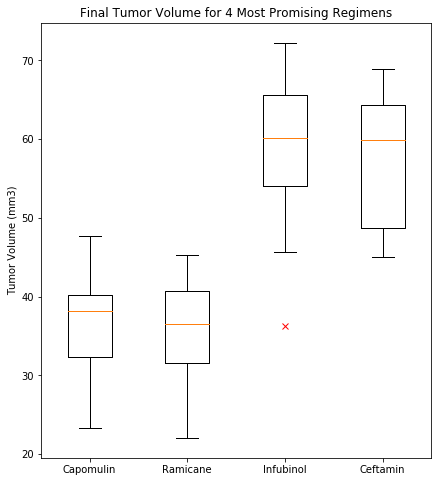

In [66]:
#plt.boxplot({ramicane_group_df["Tumor Volume (mm3)"],infubinol_group_df["Tumor Volume (mm3)"]})

#ceftamin_df, infubinol_df, capomulin_df, ramicane_df

plt.figure(figsize=(7,8))

labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

plt.boxplot([capomulin_df, ramicane_df, infubinol_df, ceftamin_df], labels=labels, sym='rx')

plt.title("Final Tumor Volume for 4 Most Promising Regimens")
plt.ylabel("Tumor Volume (mm3)")

plt.show()





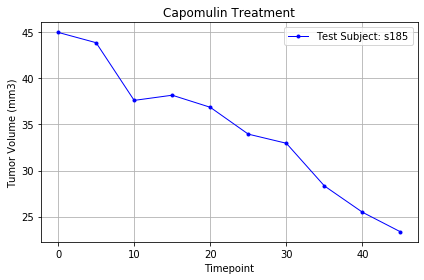

In [64]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

mouse_group = merged_df.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Timepoint"])

only_cap = mouse_group.loc[mouse_group["Drug Regimen"] == "Capomulin", :]

s185_df = only_cap.loc[only_cap["Mouse ID"] == "s185", :]

x_axis = s185_df["Timepoint"]

y_axis = s185_df["Tumor Volume (mm3)"]

s185, = plt.plot(x_axis, y_axis, marker=".", color="blue", linewidth=1)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.title("Capomulin Treatment")
plt.legend(["Test Subject: s185"])
plt.tight_layout()


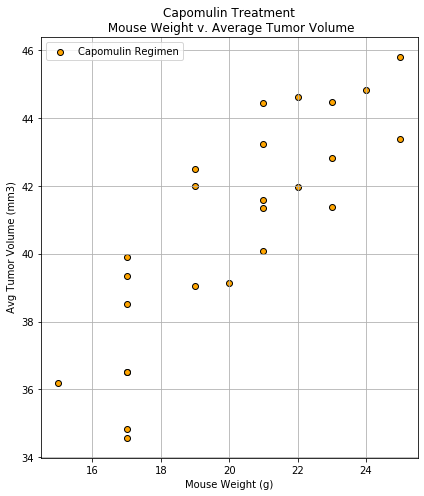

In [70]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_only = merged_df.loc[merged_df["Drug Regimen"] == "Capomulin", :]

capo_group = capomulin_only.get(["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)", "Weight (g)"])

capo_group_df = capo_group.groupby("Mouse ID")

captum_avg = capo_group_df["Tumor Volume (mm3)"].mean()

capweight = capo_group_df["Weight (g)"].mean()

capweigh_df = pd.DataFrame(capweight)


captum_avg_df = pd.DataFrame(captum_avg)
captum_avg_df

plt.figure(figsize=(6,7))

weight_axis = capweigh_df.get("Weight (g)")

tumor_axis = captum_avg_df.get("Tumor Volume (mm3)")

plt.scatter(weight_axis, tumor_axis, marker="o", facecolors="orange", edgecolors="black")
plt.title("Capomulin Treatment\n Mouse Weight v. Average Tumor Volume")
plt.xlabel("Mouse Weight (g)")
plt.ylabel(" Avg Tumor Volume (mm3)")
plt.grid()
plt.legend(["Capomulin Regimen"])
plt.tight_layout()



In [15]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen 


